In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams

In [2]:
sns.set()

In [3]:
data = pd.read_csv('C:\VOLGA.csv', sep=';')
dataset = pd.DataFrame

In [4]:
dataset = data.drop('Total', axis=1)
dataset.replace(0, np.nan, inplace=True)
dataset.interpolate(inplace=True)
#dataset['Total'] = dataset[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].sum(axis=1)
dataset

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1938,4.71,4.40,5.79,11.85,49.28,49.77,16.20,11.78,8.09,7.50,8.63,4.18
1,1939,3.00,4.38,5.68,9.07,44.46,50.28,18.21,10.50,7.59,7.87,9.20,4.31
2,1940,4.02,5.99,5.36,13.48,51.16,42.77,27.05,11.38,8.16,7.53,7.52,6.24
3,1941,3.24,5.85,6.64,7.80,39.10,66.36,54.37,15.40,10.63,10.45,8.68,4.34
4,1942,7.79,7.40,8.46,10.73,45.00,73.09,39.64,20.46,13.22,12.80,17.13,7.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2012,13.58,12.90,14.54,13.58,49.55,31.10,16.20,13.58,12.57,12.83,14.72,25.02
75,2013,18.91,16.33,18.53,27.99,52.76,36.03,16.15,13.34,12.62,13.18,14.41,17.20
76,2014,16.45,15.92,21.48,18.69,42.85,18.04,13.74,12.72,14.02,13.28,12.03,13.31
77,2015,12.56,10.93,13.10,11.90,29.73,18.87,13.90,14.17,14.83,13.79,13.09,15.21


In [5]:
dat1 = pd.DataFrame
dat1 = dataset.set_index(dataset.pop('Year').astype(str)).stack().reset_index(name='Volume')
#dat1['Year'] = dat1.pop('level_1') + '-' + dat1['Year']


In [6]:
dat1 = dat1.drop('level_1', axis=1)

In [7]:
dat1

,Year,Volume
0,1938,4.71
1,1938,4.40
2,1938,5.79
3,1938,11.85
4,1938,49.28
...,...,...
943,2016,13.95
944,2016,12.78
945,2016,13.26
946,2016,14.23


In [12]:
x = dat1.iloc[:,[0,1]].values

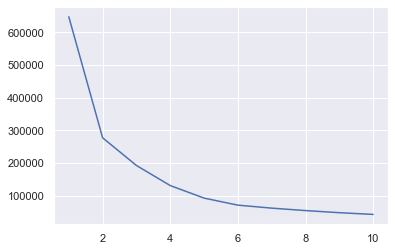

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range (1,11), wcss)
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(x)

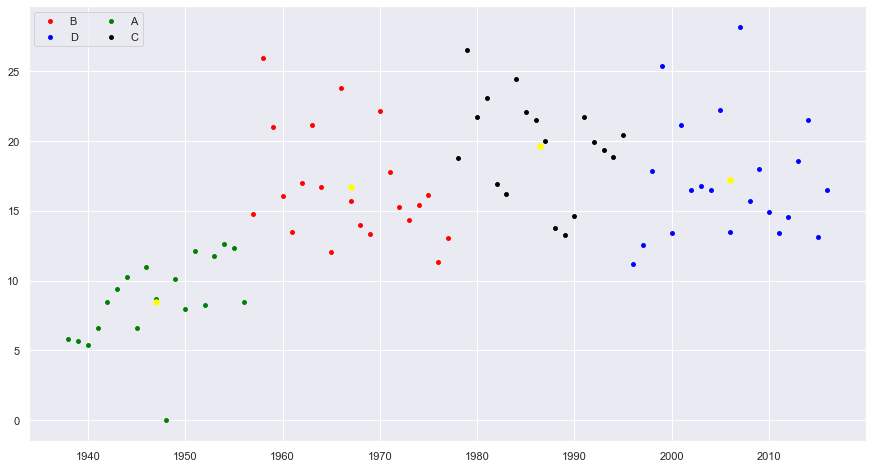

In [228]:
plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=15, c='red' )
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=15, c='blue')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=15, c='green')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=15, c='black')
plt.legend('BDAC', ncol=2, loc='upper left')
#plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s=15, c='orange', label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=30, c='yellow')

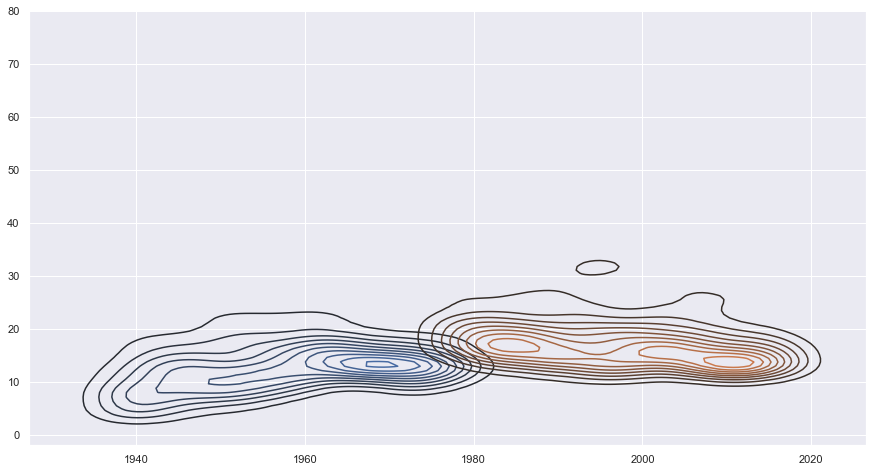

In [25]:
plt.figure(figsize=(15,8))
#plt.ylim(50)
sns.kdeplot(x[y_kmeans == 0,0], x[y_kmeans == 0,1])
sns.kdeplot(x[y_kmeans == 1,0], x[y_kmeans == 1,1])
#sns.kdeplot(x[y_kmeans == 2,0], x[y_kmeans == 2,1])
#sns.kdeplot(x[y_kmeans == 3,0], x[y_kmeans == 3,1])

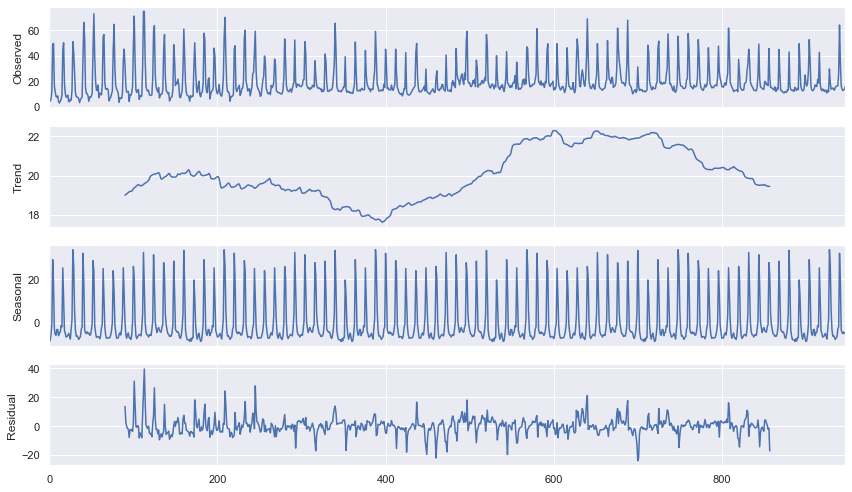

In [142]:
rcParams['figure.figsize']= 12,7
result = sm.tsa.seasonal_decompose(dat1.Volume, model='additive', freq=6*30)
result.plot()
plt.show()